In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Start

In [2]:
#read data
energy_data = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2020_Excel.csv",
    sep=";")


#rename
energy_data.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2020_Excel.csv'

In [7]:
'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl um sie als Boxplot wiedergeben zu können'''
energy_data['DatumUhrzeit'] = pd.to_datetime(energy_data['DatumUhrzeit'])
energy_data['MonatZahl'] = energy_data['DatumUhrzeit'].dt.month

#print(energy_data)

## Describe

In [8]:
#all data described
described_data = energy_data.describe()
#print(described_data)

In [9]:
#describe monthly cost
grouped = energy_data.groupby(energy_data['MonatZahl'])
describe_month = grouped['DayAheadAuktion'].describe()
#print(describe_month)

- 1 Jahreshälfte günstiger als zweite

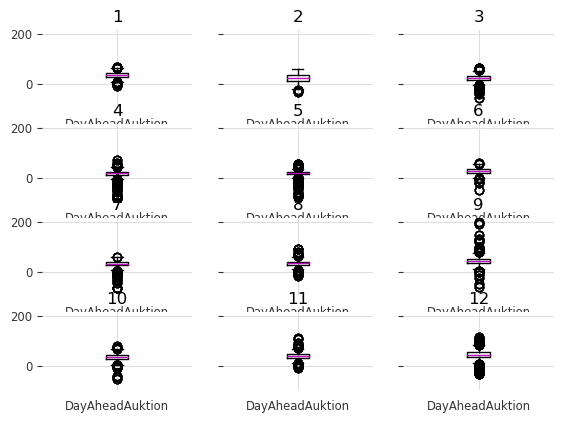

In [10]:
'''GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

### Betrachtung 2019

In [11]:
#read data
energy_data19 = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2019_Excel.csv",
    sep=";")


#rename
energy_data19.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl'''
energy_data19['DatumUhrzeit'] = pd.to_datetime(energy_data19['DatumUhrzeit'])
energy_data19['MonatZahl'] = energy_data19['DatumUhrzeit'].dt.month


In [12]:
#Beschreibung der einzelnen Monate in 2019
grouped19 = energy_data19.groupby(energy_data19['MonatZahl'])
descr_data19 = grouped19['DayAheadAuktion'].describe()
#print(descr_data19)

### Betrachtung 2019 und 2020 

Describe

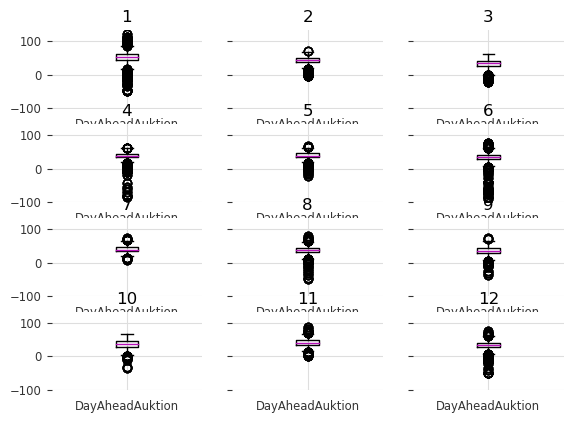

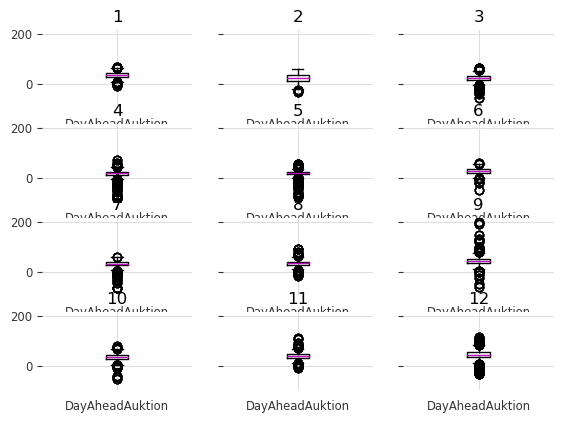

In [13]:
'''2019: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data19.groupby(energy_data19["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

'''2020: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()



In [14]:
#Zusammenführung der beiden DataFrame im Preis 
energy_1920 = pd.DataFrame()
energy_1920['Preis19'] = energy_data19['DayAheadAuktion']
energy_1920['Preis20'] = energy_data['DayAheadAuktion']
energy_1920['MonatZahl'] = energy_data['MonatZahl']
#print(energy_1920)

# Summe groupby Monat
grouped_1920 = energy_1920.groupby(energy_1920['MonatZahl'])
monthly_19 = grouped_1920['Preis19'].sum()
monthly_20 = grouped_1920['Preis20'].sum()

# mean groupby Monat
monthly_mean_19 = grouped_1920['Preis19'].mean()
monthly_mean_20 = grouped_1920['Preis20'].mean()

# List mit Monaten
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


# Sum als DataFrame zur Übersicht
sum_1920 = pd.DataFrame()
sum_1920['Sum_19'] = monthly_19
sum_1920['Sum_20'] = monthly_20
sum_1920['Mean_19'] = monthly_mean_19
sum_1920['Mean_20'] = monthly_mean_20
sum_1920['Monat'] = months
print(sum_1920)



              Sum_19     Sum_20    Mean_19    Mean_20  Monat
MonatZahl                                                   
1          147055.60  104096.64  49.413844  34.978710      1
2          119506.48   61002.56  42.926178  21.911839      2
3           90317.84   67017.48  30.348737  22.519315      3
4          105240.68   49101.68  36.541903  17.049194      4
5          113048.44   52392.12  37.986707  17.604879      5
6           93931.92   75540.00  32.615250  26.229167      6
7          119317.88   89503.04  40.093374  30.074946      7
8          108173.20  103831.76  36.348522  34.889704      8
9          104193.28  125792.92  36.178222  43.678097      9
10         108925.04  101052.76  36.601156  33.955901     10
11         119101.92  111733.96  41.354833  38.796514     11
12          91079.64  125057.44  31.624875  43.422722     12


- 2019 einiges Teurer als 2020
- in der ersten Jahrenhälfte größere Variabilität als in der zweiten 

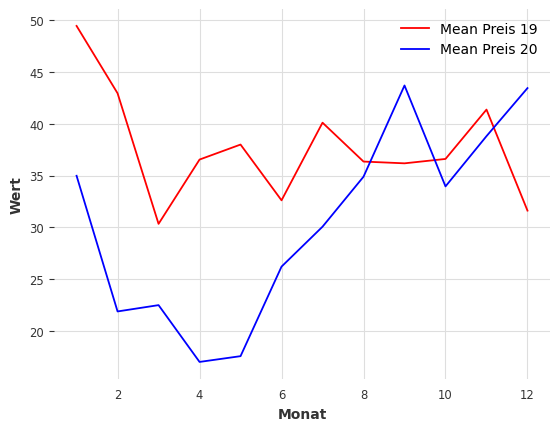

In [15]:

plt.plot(sum_1920['Monat'], sum_1920['Mean_19'], color='red', label='Mean Preis 19')
plt.plot(sum_1920['Monat'], sum_1920['Mean_20'], color='blue', label='Mean Preis 20')
plt.xlabel('Monat')
plt.ylabel('Wert')
plt.legend()
plt.show()


Korrelation

In [16]:
#Korrelation zwischen den beiden Jahren im Preis
corr_1920 = energy_1920['Preis19'].corr(energy_1920['Preis20'])
print(corr_1920)

0.2993612964446817


- Preis_Korrelation = schwache Korrelation

## Korrelationen

In [17]:
'''Hier schaue ich nach der Korrelation zwischen Preis und allen Monaten ; corr = ca. 0.352877'''
corr_price_allmonths = energy_data['DayAheadAuktion'].corr(energy_data['MonatZahl'])


### Korrelation gesamte Einspeisemenge pro Monat

In [18]:
#Neue Spalte mit der gesamten Einspeisemenge pro Monat
energy_data['sum_energy'] = energy_data['Kernenergie'] + energy_data['NichtErneuerbar'] + energy_data['Erneuerbar']

In [19]:
#Korrelation gesamte Einspeisemenge und Preis pro Monat
monthly_correlation = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['sum_energy']))
print(monthly_correlation)

MonatZahl
1     0.361788
2     0.277382
3     0.044077
4    -0.412875
5    -0.097278
6     0.166352
7    -0.139811
8     0.062338
9     0.095437
10    0.363117
11    0.560279
12    0.464622
dtype: float64


- Jan + Feb = mittlere/schwache positive Korr
- März, Mai, Aug, Sep  = sehr nahe 0 (0.0..)
- April = mittlere neg Korr
- Jun, Jul = schwache Korr (Jun pos, Jul neg)
- Okt, Nov, Dez = mittlere pos Korr

### Korrelation einzelne Stromarten und Preis

In [20]:

corr_Kern = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Kernenergie']))
corr_NEE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['NichtErneuerbar']))
corr_EE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Erneuerbar']))

korr_df = pd.DataFrame()
korr_df['Kernenergie'] = corr_Kern
korr_df['NichtErneuerbar'] = corr_NEE
korr_df['Erneuerbar'] = corr_EE
print(korr_df)

           Kernenergie  NichtErneuerbar  Erneuerbar
MonatZahl                                          
1             0.486067         0.802410   -0.519095
2             0.798983         0.816219   -0.605900
3             0.667403         0.814526   -0.638691
4             0.552308         0.661363   -0.635914
5             0.128467         0.701089   -0.467538
6            -0.058374         0.811154   -0.385433
7             0.247633         0.814591   -0.535439
8             0.265481         0.797882   -0.380815
9             0.044174         0.687141   -0.384536
10            0.130150         0.825660   -0.477425
11            0.571606         0.864198   -0.550152
12            0.529557         0.781764   -0.625898


- Kern = größere Variabilität, pos, eher schwache Korr Mai-Okt, mittlere Nov - April, 
min: Jun (-0.05), max: Feb(0.79), Spannweite = 0.84

- NEE = wenig Variabilität, starke pos Korr, 
min: April (0.66), max: Nov (0.86), Spannweite = 0.2

- EE = wenig Variabilität, neg, mittlere - starke Korr, 
min: Aug (-0.38), max: März (-0.63), Spannweite = 0.25

### Inwiefern beeinflusst der vergangene Energiepreis den zukünftigen Energiepreis?

In [21]:

#ChatGPT: 

# Verschieben der Datenreihe um eine ganze Woche um den gleichen Zeitpunkt eines bestimmten Tages
# zu bekommen, 1 Tag = 96 Datenreihen, 6 Tage * 96 = 576 + 1 um auf 1 Reihe des nächsten Tages zu kommen. 
# Wöchentlich macht Sinn denn: Wir wollen wissen was der günstigste Preis in der nächsten Woche ist. 
energy_data['DayAheadAuktion_Lag1'] = energy_data['DayAheadAuktion'].shift(577)

# Korrelation berechnen
correlation = energy_data['DayAheadAuktion'].corr(energy_data['DayAheadAuktion_Lag1'])

print(correlation)


0.5042816946533227


## Betrachtung Klimadaten

### Sonne

In [22]:
sonne_data = pd.read_csv("D:/4TechLabs/team-6-energy-costs/data/energy-charts_Globale_Solarstrahlung_in_Deutschland_im_Jahr_2020_Excel.csv", 
sep = ';')

#rename
sonne_data.rename(columns={"Date (UTC)": "DatumUhrzeit"}, inplace=True)



#Neue Spalte für Monat
sonne_data['DatumUhrzeit'] = pd.to_datetime(sonne_data['DatumUhrzeit'])
sonne_data['MonatZahl'] = sonne_data['DatumUhrzeit'].dt.month

#print(sonne_data)


#Describe
descr_sonne = sonne_data.describe()
print (descr_sonne)


             Value    MonatZahl
count  8784.000000  8784.000000
mean    136.898110     6.513661
std     204.334284     3.451430
min       0.000000     1.000000
25%       0.000000     4.000000
50%      10.000000     7.000000
75%     212.250000    10.000000
max     910.000000    12.000000


In [23]:
# Summe groupby Monat
grouped_sonne = sonne_data.groupby(sonne_data['MonatZahl'])
monthly_sonne = grouped_sonne['Value'].sum()

print(monthly_sonne)


MonatZahl
1      25314
2      39268
3      98185
4     164943
5     174145
6     165759
7     174936
8     148991
9     110590
10     50131
11     32387
12     17864
Name: Value, dtype: int64


In [24]:
'''Hier schaue ich nach der Korrelation zwischen Value und allen Monaten ; corr = ca.-0.068'''
corr_sun_allmonths = sonne_data['Value'].corr(sonne_data['MonatZahl'])
print(corr_sun_allmonths)

-0.06870672808654259


### Wind

In [25]:
wind_data = pd.read_csv("D:/4TechLabs/team-6-energy-costs/data/energy-charts_Windgeschwindigkeit_in_Deutschland_im_Jahr_2020_Excel.csv", 
sep = ';')

#rename
wind_data.rename(columns={"Date (UTC)": "DatumUhrzeit"}, inplace=True)



#Neue Spalte für Monat
wind_data['DatumUhrzeit'] = pd.to_datetime(wind_data['DatumUhrzeit'])
wind_data['MonatZahl'] = wind_data['DatumUhrzeit'].dt.month

print(wind_data)

descr_wind = wind_data.describe()

#print(descr_wind)

            DatumUhrzeit  Value  MonatZahl
0    2020-01-01 00:00:00    2.4          1
1    2020-01-01 01:00:00    2.4          1
2    2020-01-01 02:00:00    2.5          1
3    2020-01-01 03:00:00    2.4          1
4    2020-01-01 04:00:00    2.4          1
...                  ...    ...        ...
8779 2020-12-31 19:00:00    2.8         12
8780 2020-12-31 20:00:00    2.8         12
8781 2020-12-31 21:00:00    2.7         12
8782 2020-12-31 22:00:00    2.6         12
8783 2020-12-31 23:00:00    2.6         12

[8784 rows x 3 columns]


In [26]:
# Summe groupby Monat
grouped_wind = wind_data.groupby(wind_data['MonatZahl'])
monthly_wind = grouped_wind['Value'].sum()

print(monthly_wind)

MonatZahl
1     3091.4
2     4155.6
3     3293.5
4     2516.7
5     2501.1
6     2301.9
7     2370.0
8     2228.9
9     2035.6
10    2867.1
11    2458.1
12    2661.2
Name: Value, dtype: float64


### Neues DataFrame mit monatlichen Kosten (energydata) + summe_sonne + summe_wind

In [27]:

sum_month_price = grouped['DayAheadAuktion'].sum()

klima_data = pd.DataFrame()
klima_data['DayAheadAuktion'] = sum_month_price
klima_data['Einspeisemenge'] = energy_data['sum_energy']
klima_data['Sonne'] = monthly_sonne
klima_data['Wind'] = monthly_wind

print(klima_data)

           DayAheadAuktion  Einspeisemenge   Sonne    Wind
MonatZahl                                                 
1                104096.64       52092.796   25314  3091.4
2                 61002.56       52059.062   39268  4155.6
3                 67017.48       52101.871   98185  3293.5
4                 49101.68       52198.786  164943  2516.7
5                 52392.12       52133.098  174145  2501.1
6                 75540.00       52175.041  165759  2301.9
7                 89503.04       52330.184  174936  2370.0
8                103831.76       52486.806  148991  2228.9
9                125792.92       52473.207  110590  2035.6
10               101052.76       52570.907   50131  2867.1
11               111733.96       52724.019   32387  2458.1
12               129590.08       52683.869   17864  2661.2


### Korrelation 

In [28]:
# Preis und Value von Sonne und Wind 
corr_sonne_price = klima_data['DayAheadAuktion'].corr(klima_data['Sonne'])
corr_wind_price = klima_data['DayAheadAuktion'].corr(klima_data['Wind'])

print(corr_sonne_price)
print(corr_wind_price)

-0.5049288033197764
-0.3637772897106626


In [29]:
# Einspeisemenge und Value von Sonne und Wind 
corr_sonne_amount = klima_data['Einspeisemenge'].corr(klima_data['Sonne'])
corr_wind_amount = klima_data['Einspeisemenge'].corr(klima_data['Wind'])

print(corr_sonne_amount)
print(corr_wind_amount)

-0.3351543783710715
-0.4754923696475423


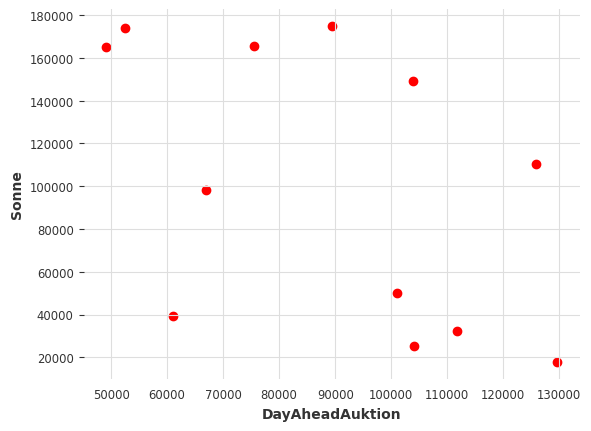

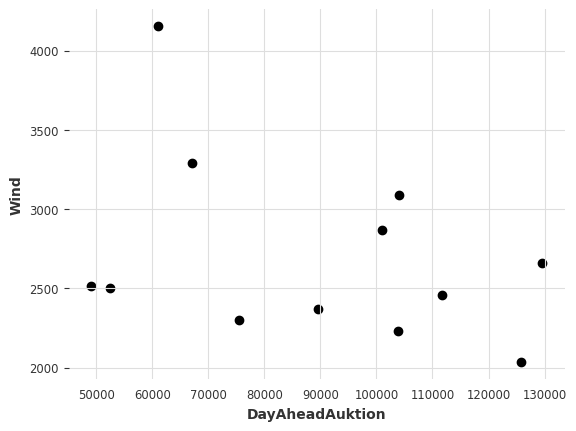

In [30]:
plt.scatter(klima_data['DayAheadAuktion'], klima_data['Sonne'], color='red')
plt.xlabel('DayAheadAuktion')
plt.ylabel('Sonne')
plt.show()

plt.scatter(klima_data['DayAheadAuktion'], klima_data['Wind'])
plt.xlabel('DayAheadAuktion')
plt.ylabel('Wind')
plt.show()

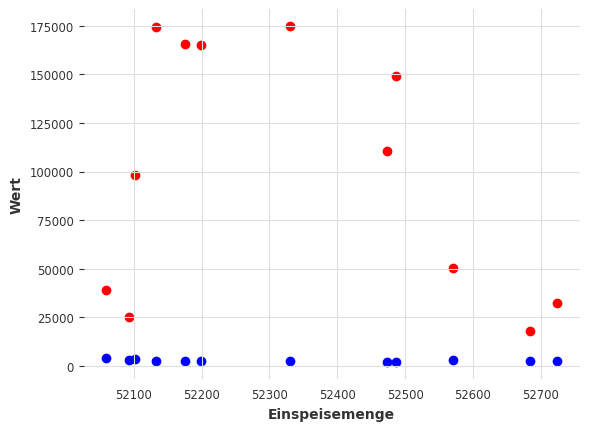

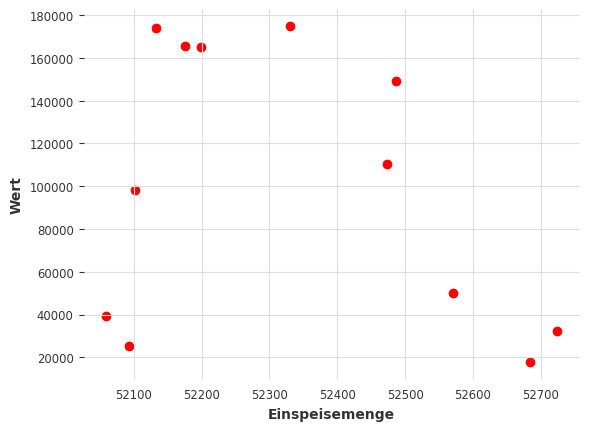

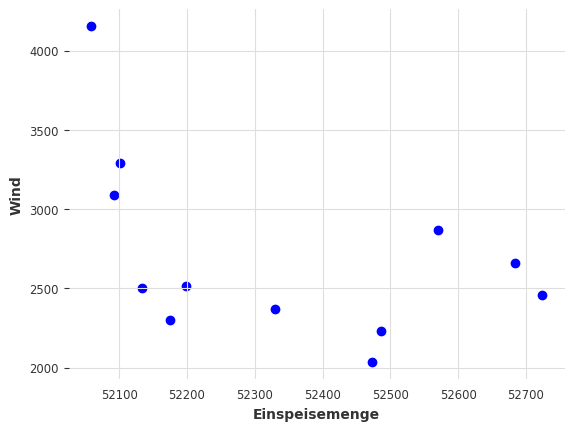

In [31]:
plt.scatter(klima_data['Einspeisemenge'], klima_data['Sonne'], color='red')
plt.scatter(klima_data['Einspeisemenge'], klima_data['Wind'], color = 'blue')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wert')
plt.show()


plt.scatter(klima_data['Einspeisemenge'], klima_data['Sonne'], color='red')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wert')
plt.show()

plt.scatter(klima_data['Einspeisemenge'], klima_data['Wind'], color = 'blue')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wind')
plt.show()


# Prepared Data

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams

df = pd.read_csv(
    "C:/Users/zawad/OneDrive/Desktop/team-6-energy-costs/data/prepared/df_energy_climate_2020.csv")

In [129]:
del df['date']
del df['day_of_week']
del df['time']

df.corr()
df.head()

,datetime,wind_speed,solar_radiation,temperature,month,nuclear_power,not_renewable,renewable,energy_price,total_energy_feeding
0,2020-01-01 00:00:00,2.4,0,-0.1,1,8088.21750,29512.74850,14541.30200,38.60,52142.26800
1,2020-01-01 01:00:00,2.4,0,-0.5,1,8081.15875,29178.66275,14949.45575,36.55,52209.27725
2,2020-01-01 02:00:00,2.5,0,-0.7,1,8071.44750,29414.36225,15077.92500,32.32,52563.73475
3,2020-01-01 03:00:00,2.4,0,-1.0,1,8072.27750,29365.12575,15307.22725,30.85,52744.63050
4,2020-01-01 04:00:00,2.4,0,-1.2,1,8068.91550,29436.37500,15320.25825,30.14,52825.54875


## Energy Price Autokorrelation stündlich eine ganze Woche 

Figure(1200x800)


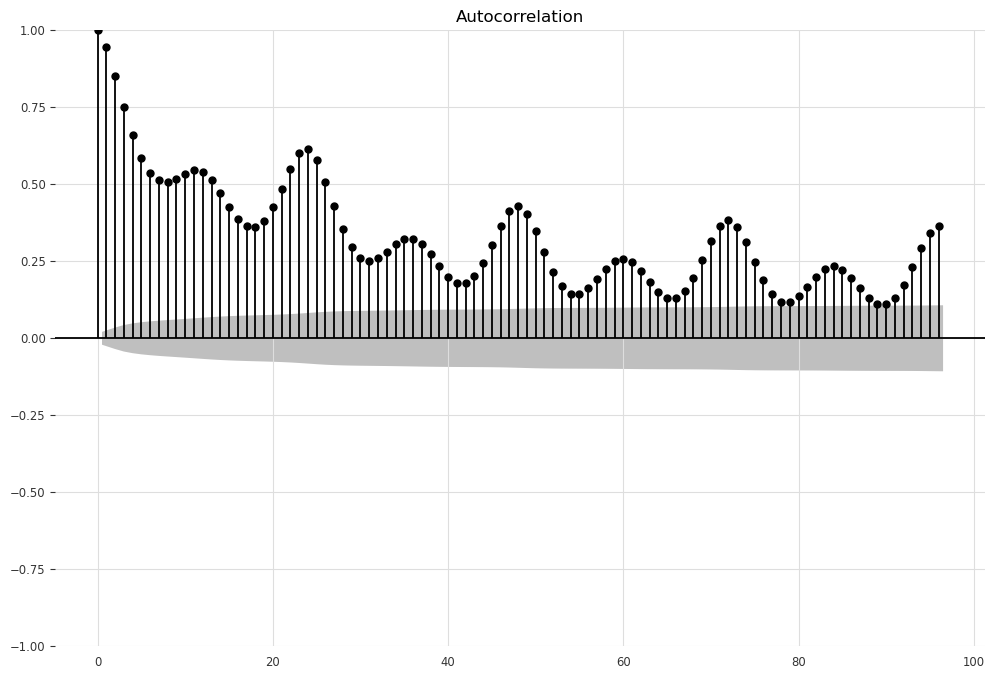

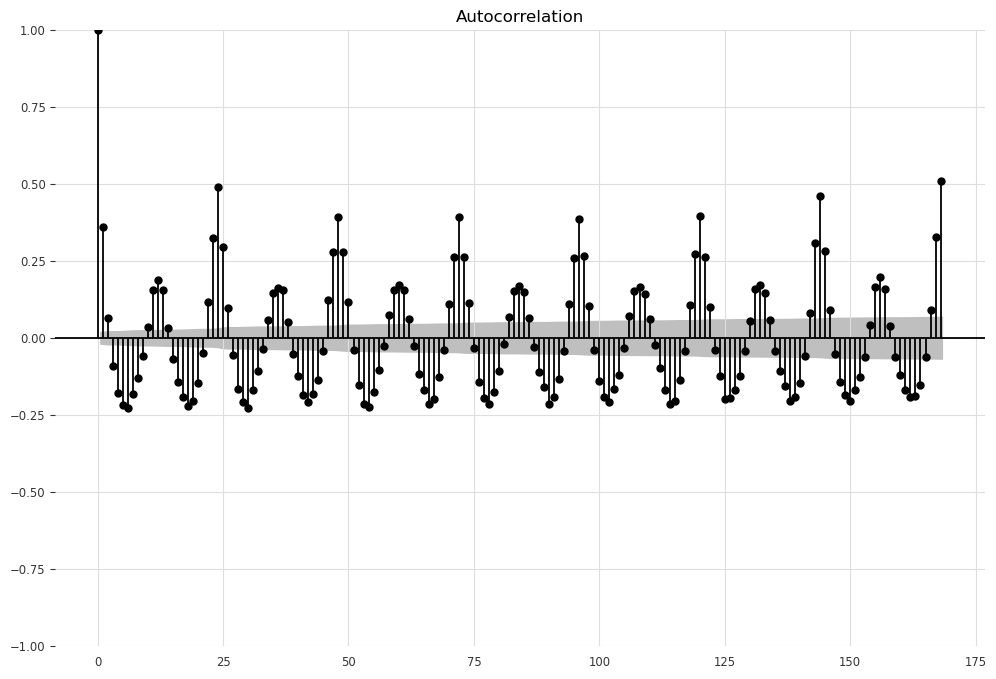

In [34]:
plt.rcParams['figure.figsize'] = (12, 8)

# 168 weil wir einen stündlichen Datensatz haben und die Autokorrelation für eine Woche sehen wollen 
acf = plot_acf(df['energy_price'], lags=96)
auto_corr = plot_acf(df["energy_price"].diff().dropna(), lags = 168)
print(auto_corr)

## WindSpeed Autokorrelation stündlich eine Woche

Figure(1200x800)


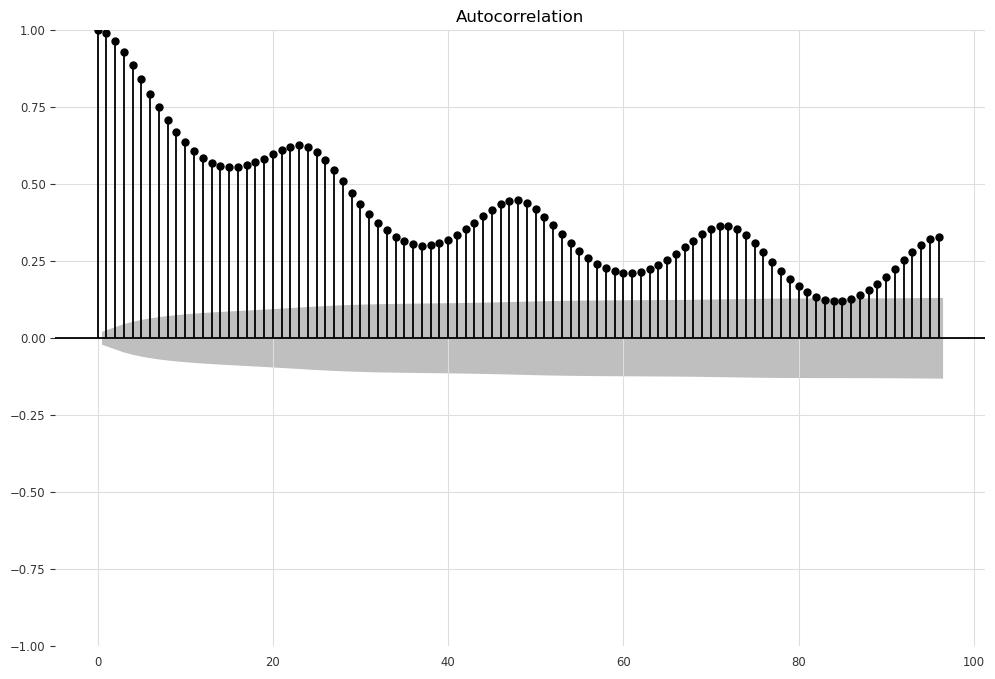

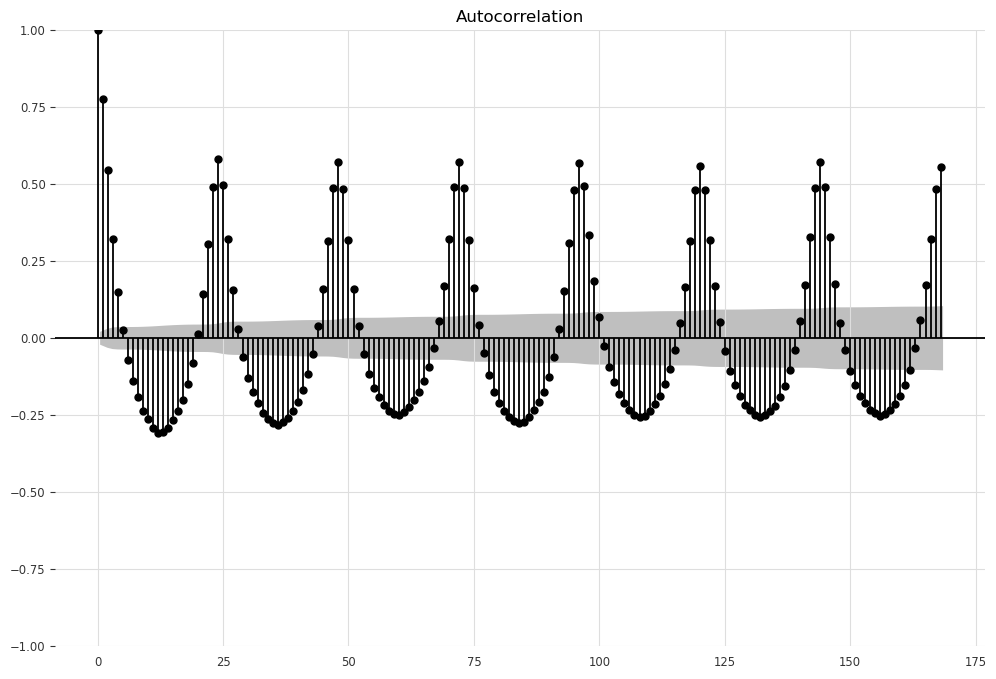

In [35]:
acf = plot_acf(df['wind_speed'], lags=96)
auto_wind = plot_acf(df["wind_speed"].diff().dropna(), lags = 168)
print(auto_wind)

# Darts Library

In [65]:
from darts import TimeSeries


## Exponential Smoothing ohne cross-validation

In [26]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "datetime",'energy_price')

# Set aside the last 20% as a validation series, ca. 8000 - 20% = 1752 
train, val = series.split_after(0.8)

In [29]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing(seasonal_periods=168)
model.fit(train)
prediction = model.predict(len(val))

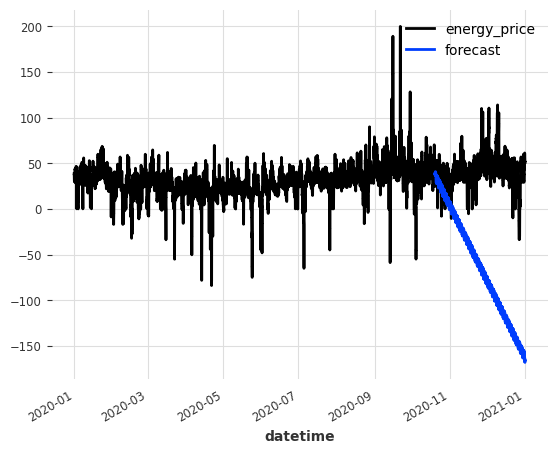

In [30]:
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [31]:
#mape = mean absolute percentage error --> Die Werte weichen zu 1201,479% ab. 
#mase = mean absolute scale error --> 4,31 größerer absoluter Fehler als naive Vorhersage, z.B. einfachen vorherigen Wert nehmen

from darts.metrics import mape, mase

score_mape = mape(val, prediction)
print('Score of mape is:', score_mape)

score_mase = mase(val, prediction, train)
print('Score of mase:', score_mase)


Score of mape is: 3061.449670773842
Score of mase: 116.42601370500006


# Random Forest Regression mit allen Features

In [64]:
#from sklearn.ensemble import RandomForestRegressor


In [65]:
#model = RandomForestRegressor()
#df.head(1)
#df.info()

In [46]:
#create feature dataset, take everything except last row

X = df[['wind_speed', 'solar_radiation', 'temperature', 'nuclear_power', 'not_renewable', 'renewable']]
X = X[:len(df)-1]


In [47]:
#create target database

y = df['energy_price']
y = y[:len(df)-1]

In [48]:
# Trains model

model.fit(X, y)

RandomForestRegressor()

In [49]:
#Test model
prediction = model.predict(X)
print('The model score is:', model.score(X,y))

The model score is: 0.9851000889004985


In [51]:
#Make actual prediciton
new_data = df[['wind_speed', 'solar_radiation', 'temperature', 'nuclear_power', 'not_renewable', 'renewable']].tail(1)
prediciton = model.predict(new_data)

print('The model predicts the last row:', prediciton)
print('The actual price is:', df['energy_price'].tail(1))

The model predicts the last row: [45.5029]
The actual price is: 8783    50.87
Name: energy_price, dtype: float64


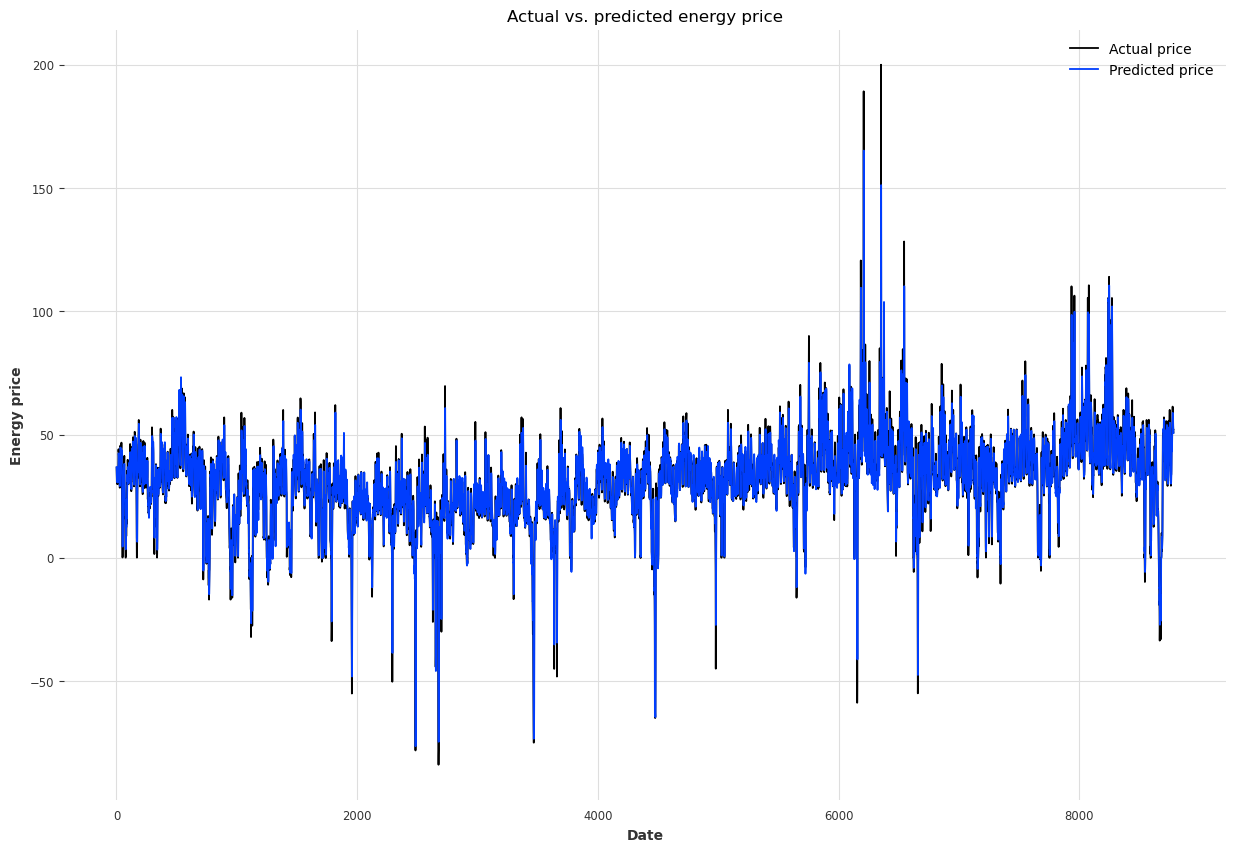

In [52]:
actual_price = df['energy_price'].tail(-1)

# Create a plot
plt.figure(figsize=(15, 10))
plt.plot(actual_price.index, actual_price.values, label='Actual price')
plt.plot(actual_price.index, prediction, label='Predicted price')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Energy price')
plt.title('Actual vs. predicted energy price')
plt.legend()

# Show the plot
plt.show()


# Random Forest Regression ohne zusätzliche Wetterdaten

In [ ]:
model2 = RandomForestRegressor()


In [ ]:
#create feature dataset, take everything except last row

X = df[['nuclear_power', 'not_renewable', 'renewable']]
X = X[:len(df)-15]

In [ ]:
#create target database

y = df['energy_price']
y = y[:len(df)-15]

In [ ]:
# Trains model

model2.fit(X, y)

#Test model
prediction = model2.predict(X)
print('The model score is:', model2.score(X,y))



The model score is: 0.9779223090469394


In [ ]:
#Make actual prediciton
new_data = df[['nuclear_power', 'not_renewable', 'renewable']].tail(15)
prediciton = model2.predict(new_data)

print('The model predicts the price:', prediction)
print('The actual price is:', df['energy_price'].tail(15))


compare_data = pd.DataFrame()
compare_data['real_cost'] = len(df['energy_price']) 
compare_data['prediction'] = prediction 

compare_data.tail(15)






The model predicts the price: [34.8511 34.7577 31.6712 ... 36.0587 43.2793 46.1043]
The actual price is: 8769    43.23
8770    43.57
8771    50.52
8772    52.36
8773    53.08
8774    56.54
8775    59.20
8776    61.34
8777    61.08
8778    59.47
8779    56.70
8780    52.44
8781    51.86
8782    52.26
8783    50.87
Name: energy_price, dtype: float64


,real_cost,prediction
8754,NaN,51.6660
8755,NaN,44.9662
8756,NaN,41.0586
8757,NaN,39.4530
8758,NaN,35.5893
8759,NaN,31.5754
8760,NaN,30.7762
8761,NaN,30.1081
8762,NaN,29.1217
8763,NaN,30.3521


# Darts library

In [16]:
from darts import TimeSeries

In [ ]:
#train, val = series.split_before(pd.Timestamp("2020-01-01"))
#train.plot(label="training")
#val.plot(label="validation")

#df.head(1)

## Baseline Model

### Naive Seasonal

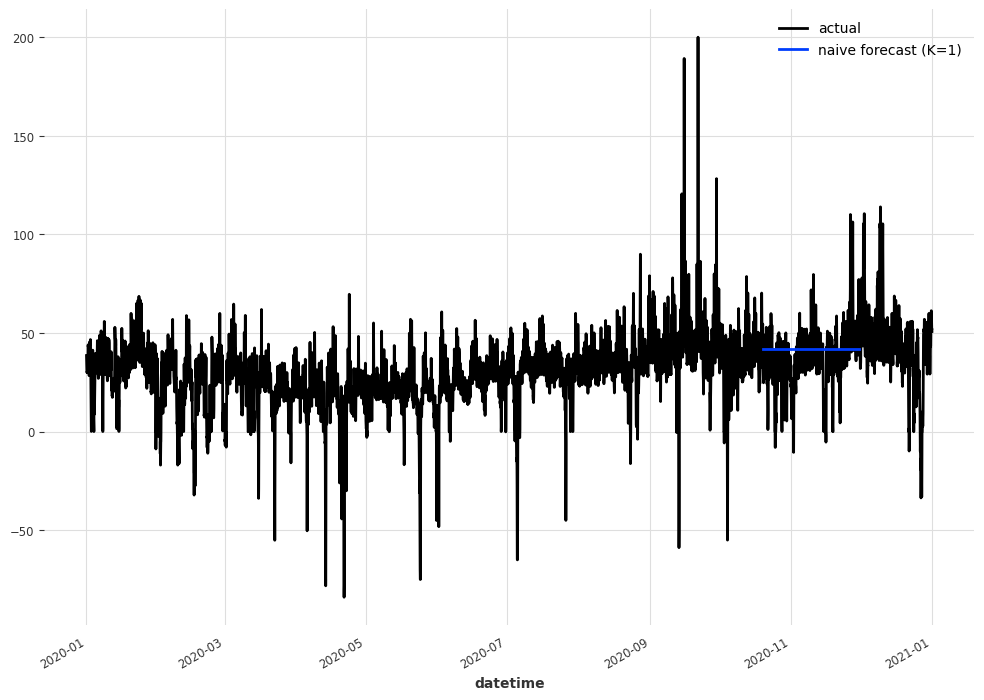

In [54]:
# always “repeats” the value that occured K time steps ago, e.g. 800 steps ago

from darts.models import NaiveSeasonal

naive_model = NaiveSeasonal(K=1)
naive_model.fit(train)
naive_forecast = naive_model.predict(1000)

series.plot(label="actual")
naive_forecast.plot(label="naive forecast (K=1)")

## Seasonality

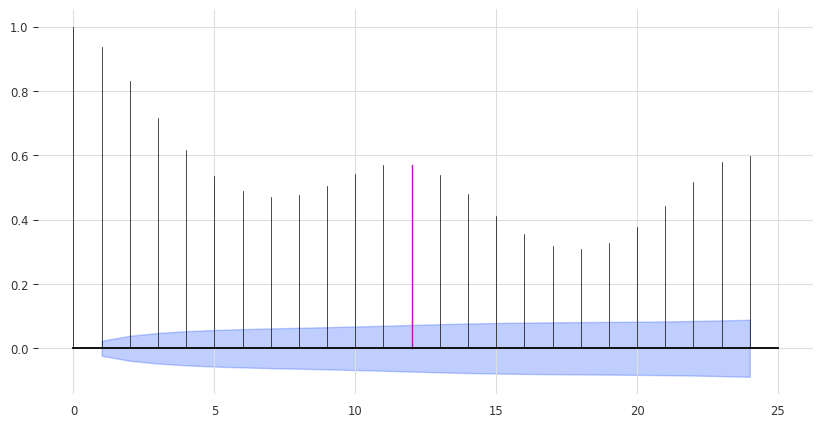

In [55]:
from darts.utils.statistics import plot_acf, check_seasonality

plot_acf(train, m=12, alpha=0.05)

In [56]:
for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

There is seasonality of order 12.


### More precise NaiveSeasonal

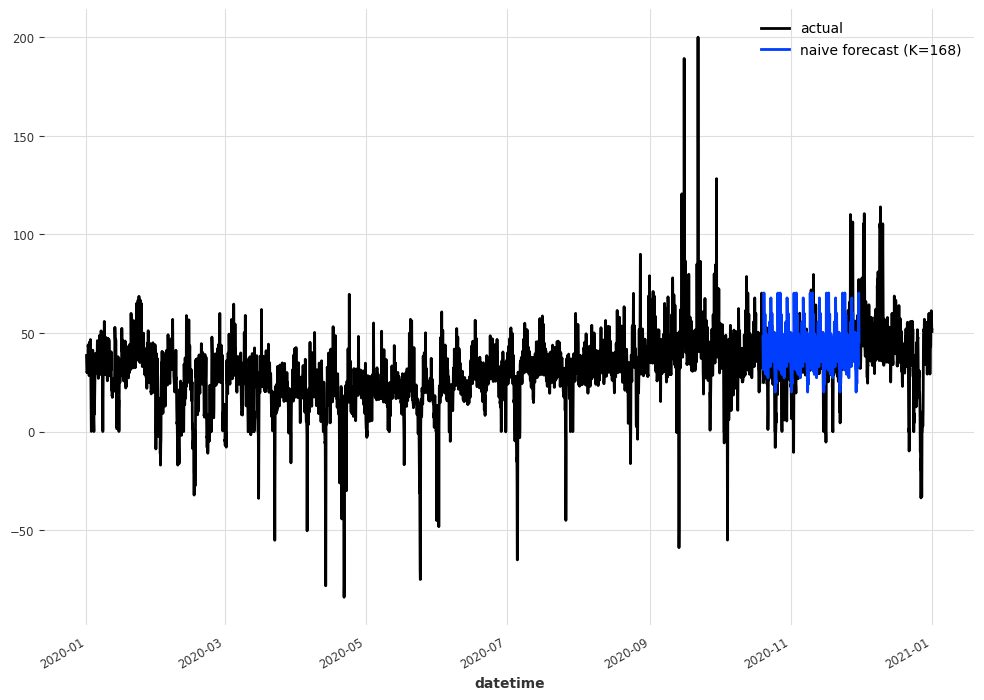

In [57]:
#Takes autokorrelation, seasonality: 168 for weekly, 96 for daily

seasonal_model = NaiveSeasonal(K=168)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(1000)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=168)")

# Naive Drift

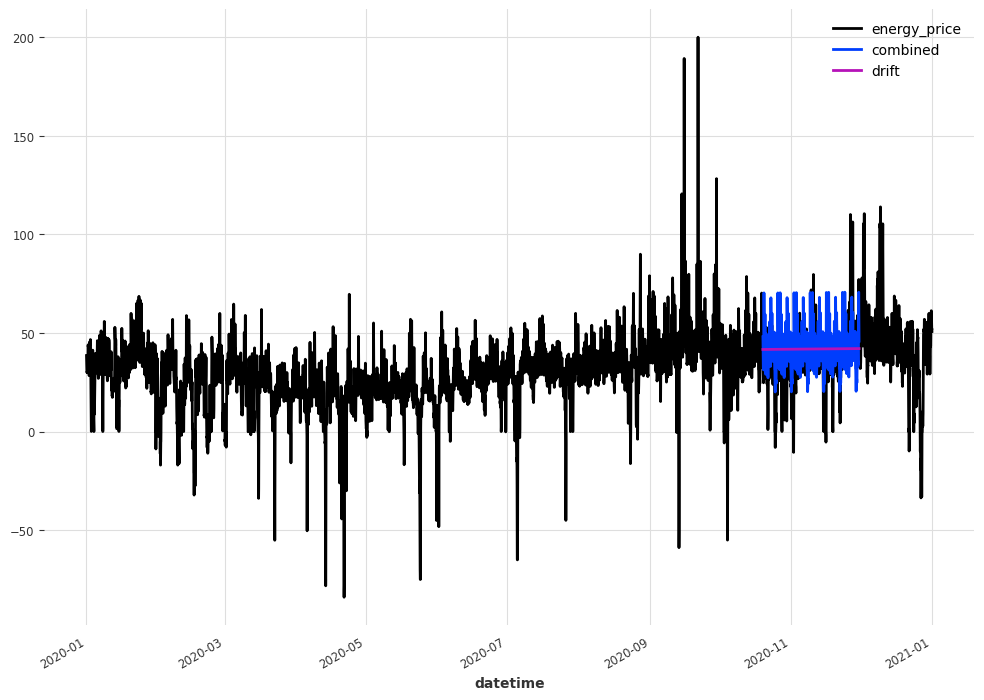

In [ ]:
from darts.models import NaiveDrift

drift_model = NaiveDrift()
drift_model.fit(train)
drift_forecast = drift_model.predict(1000)

combined_forecast = drift_forecast + seasonal_forecast - train.last_value()

series.plot()
combined_forecast.plot(label="combined")
drift_forecast.plot(label="drift")

# Mape


In [59]:
from darts.metrics import mape

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(series, combined_forecast)
    )
)

Mean absolute percentage error for the combined naive drift + seasonal: 1472.75%.


In [22]:
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, Theta


def eval_model(model):
    model.fit(train)
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


eval_model(ExponentialSmoothing())
#eval_model(TBATS())
#eval_model(AutoARIMA())
#eval_model(Theta())

ValueError: seasonal_periods has not been provided and index does not have a known freq. You must provide seasonal_periods

# Train, Val und Test

In [66]:
#df.info()
series = TimeSeries.from_dataframe(df, "datetime",'energy_price')

train_data = series[:5270]
valid_data = series[5271:7028]
test_data = series[7029:]

# historical forecast Exponential Smoothing

  0%|          | 0/98 [00:00<?, ?it/s]

MAPE = 145.00%


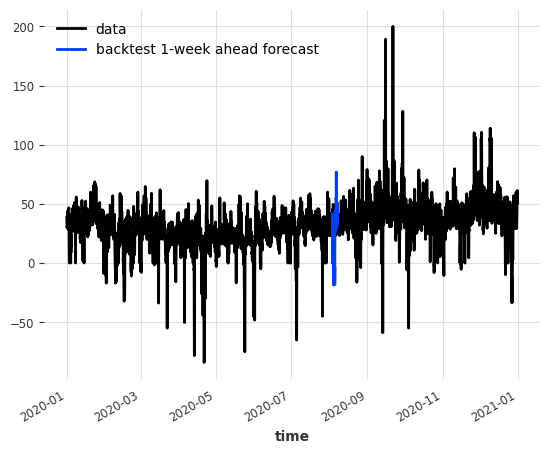

In [67]:
'''historical forecast = Vorhersagen treffen, basierend auf vergangenen Daten. Keine Überprüfung auf Basis von nicht verwendetetn 
Daten, die die Kontrolle wären. 
train_data (ich habe jetzt valid_data genommen weil cross-val nicht gemacht und so mehr daten hier)'''

backtest = model.historical_forecasts(train_data, start=0.95, forecast_horizon=168, verbose=True)

#series = TimeSeries die wir erstellt haben und verwenden
#start = startzeitpunkt ab dem die erste Vorhersage beginnt, heißt: 0.5 --> bei 50% getraint und dann erste Vorhersage, 
# dann weiter trainiert (Cross-Validation)
# 0.98 --> hier erste Vorhersage, daher so klein
# je eher der Start zeitpunkt desto mehr Vorhersagen müssen getroffen werden, dann dauert es sehr lange


series.plot(label="data")
backtest.plot(label="backtest 1-week ahead forecast")
print("MAPE = {:.2f}%".format(mape(backtest, series)))

# Cross Validation

In [107]:
'''Cross-Validation = Überprüfen, ob die Vorhersagen auch auf neuen Daten gut sind. 
Aufteilung der Daten in Train und Kontroll Daten.
valid_data'''
'''Es gibt keinen seperaten Schritt hierfür.'''


'Cross-Validation = Überprüfen, ob die Vorhersagen auch auf neuen Daten gut sind. \nAufteilung der Daten in Train und Kontroll Daten.'

## Backtest 

  0%|          | 0/887 [00:00<?, ?it/s]

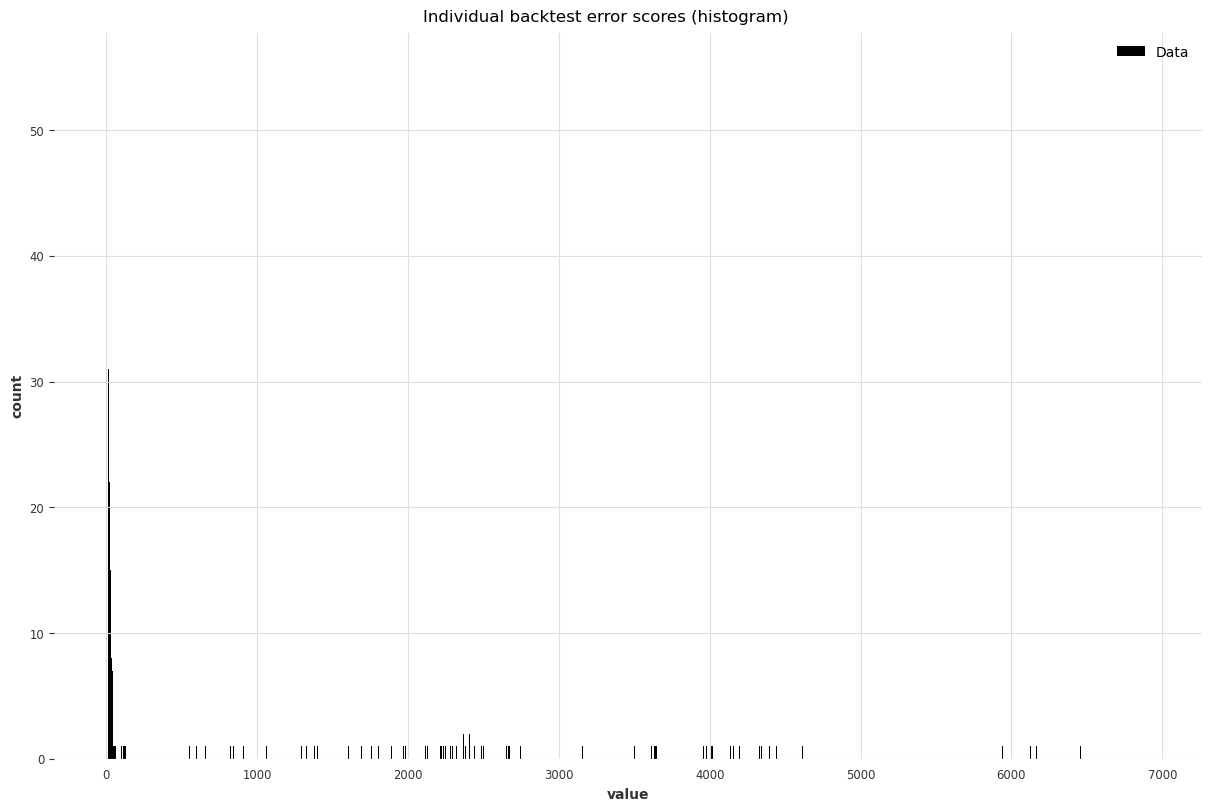

In [123]:
'''Backtesting: Testen, wie gut die Vorhersagen auf historischen Daten funktionieren, 
die nicht zum Training verwendet wurden. 
test_data'''

raw_errors = model.backtest(
    test_data, start=0.4, forecast_horizon=168, metric=mape, reduction=None, verbose=True
)

'''
series = verwendete TimeSeries
start = erste mal prediction
forecast_horizon = für 168 Std. 
metric = mape wird ausgewertet
reduction = einzelne Fehlermeldungen kombinieren'''

from darts.utils.statistics import plot_hist
import numpy as np

plot_hist(
    raw_errors,
    bins=np.arange(0, max(raw_errors), 1),
    title="Individual backtest error scores (histogram)",
)

In [126]:
average_error = model.backtest(
    train_data,
    start=0.95,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/98 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 317.90


Mögliche Gründe für unterschiedlichen MAPE: 

- "Eine mögliche Erklärung dafür ist Overfitting. Wenn das Modell während des Trainings zu komplex ist, kann es die vorhandenen Daten zu genau wiedergeben, anstatt zukünftige Daten vorherzusagen. Als Ergebnis kann das Modell bei der Vorhersage von unbekannten Daten ungenau sein. Dies kann dazu führen, dass der MAPE während des Trainings niedrig ist, aber der MAPE während des Backtests hoch ist." 
Komplex heißt: 
"Overfitting tritt auf, wenn das Modell während des Trainings zu viele Parameter hat oder zu komplex ist, um genaue Vorhersagen auf unbekannte Daten zu treffen. In diesem Fall passt sich das Modell zu gut an die Trainingsdaten an und fängt die zufälligen Variationen in den Trainingsdaten ein, anstatt die zugrunde liegende Struktur der Daten zu modellieren. Als Ergebnis kann das Modell auf unbekannte Daten ungenau sein und zu einem hohen Fehler führen."

- Datenqualität

- Anpassung der Trainingsmethode

# Exponential Smoothing 

In [155]:
series = TimeSeries.from_dataframe(df, "datetime",'energy_price')

### Model fit

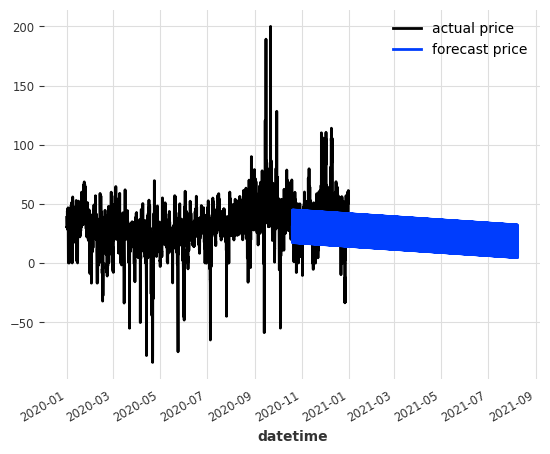

In [163]:
from darts.models import ExponentialSmoothing

splitting_point = (int(len(series)*0.20))

# Set aside the second half of series as a validation series
train_data, test_data = series[:-splitting_point], series[-splitting_point:]

# Ein ExponentialSmoothing-Modell erstellen
model = ExponentialSmoothing(seasonal_periods=12)

# Modell trainieren
model.fit(train_data)
pred = model.predict(len(val))

series.plot(label='actual price')
pred.plot(label='forecast price')

### historical forecast nicht mehr machen

In [75]:
'''historical forecast = Vorhersagen treffen, basierend auf vergangenen Daten. Keine Überprüfung auf Basis von nicht verwendetetn 
Daten, die die Kontrolle wären. 
train_data --> weniger Daten'''

backtest = model.historical_forecasts(train_data, start=0.95, forecast_horizon=168, verbose=True)

#series = TimeSeries die wir erstellt haben und verwenden
#start = startzeitpunkt ab dem die erste Vorhersage beginnt, heißt: 0.5 --> bei 50% getraint und dann erste Vorhersage, 
# dann weiter trainiert (Cross-Validation)
# 0.98 --> hier erste Vorhersage, daher so klein
# je eher der Start zeitpunkt desto mehr Vorhersagen müssen getroffen werden, dann dauert es sehr lange


series.plot(label="data")
backtest.plot(label="backtest 1-week ahead forecast")
print("MAPE = {:.2f}%".format(mape(backtest, series)))

  0%|          | 0/186 [00:00<?, ?it/s]

KeyboardInterrupt: 

### backtesting mit train data

In [165]:
'''Backtesting: Testen, wie gut die Vorhersagen auf historischen Daten funktionieren, 
die nicht zum Training verwendet wurden. 
test_data'''

raw_errors = model.backtest(
    train_data, start=0.95, forecast_horizon=168, metric=mape, reduction=np.mean, verbose=True
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

'''
series = verwendete TimeSeries
start = erste mal prediction
forecast_horizon = für 168 Std. 
metric = mape wird ausgewertet
reduction = einzelne Fehlermeldungen kombinieren'''


  0%|          | 0/186 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 1989.65


'\nseries = verwendete TimeSeries\nstart = erste mal prediction\nforecast_horizon = für 168 Std. \nmetric = mape wird ausgewertet\nreduction = einzelne Fehlermeldungen kombinieren'

### backtesting ganze series

In [167]:
average_error = model.backtest(
    series,
    start=0.98,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)


  0%|          | 0/10 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 2825.15


TypeError: 'numpy.float64' object is not iterable

- 1. Mape = 1989%
- 2. Mape = 2825%

# XGBoost

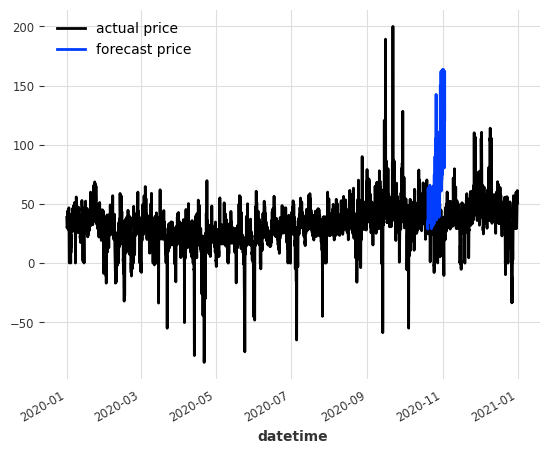

In [172]:
import darts.models as models

model = models.XGBModel(
    lags=168
)

# Modell trainieren
model.fit(train_data)
pred = model.predict(336, series=train_data)

series.plot(label='actual price')
pred.plot(label='forecast price')

### backtest mit train_data

In [171]:
average_error = model.backtest(
    train_data,
    start=0.97,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/45 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 16.53


### backtest mit ganzer series

In [173]:
average_error = model.backtest(
    series,
    start=0.98,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 1989.65


- 1. Mape = 16,5%
- 2. Mape = 1990 %

## XGBModel mit Covariates

In [176]:
from darts.dataprocessing.transformers import Scaler
from darts import concatenate
from darts.utils.timeseries_generation import datetime_attribute_timeseries as dt_attr
from sklearn.linear_model import BayesianRidge

# covariates wind
series_wind = TimeSeries.from_dataframe(
    df, 
    time_col="datetime",
    value_cols=["wind_speed"]
)

# covariates not renewable
series_not_renewable = TimeSeries.from_dataframe(
    df,
    time_col='datetime',
    value_cols=['not_renewable']
)

# Scaler = transform the generated covariates
scaler = Scaler()
train_price_scaled, not_renewable_scaled, wind_scaled = scaler.fit_transform([
    train_data, 
    series_not_renewable, 
    series_wind
])


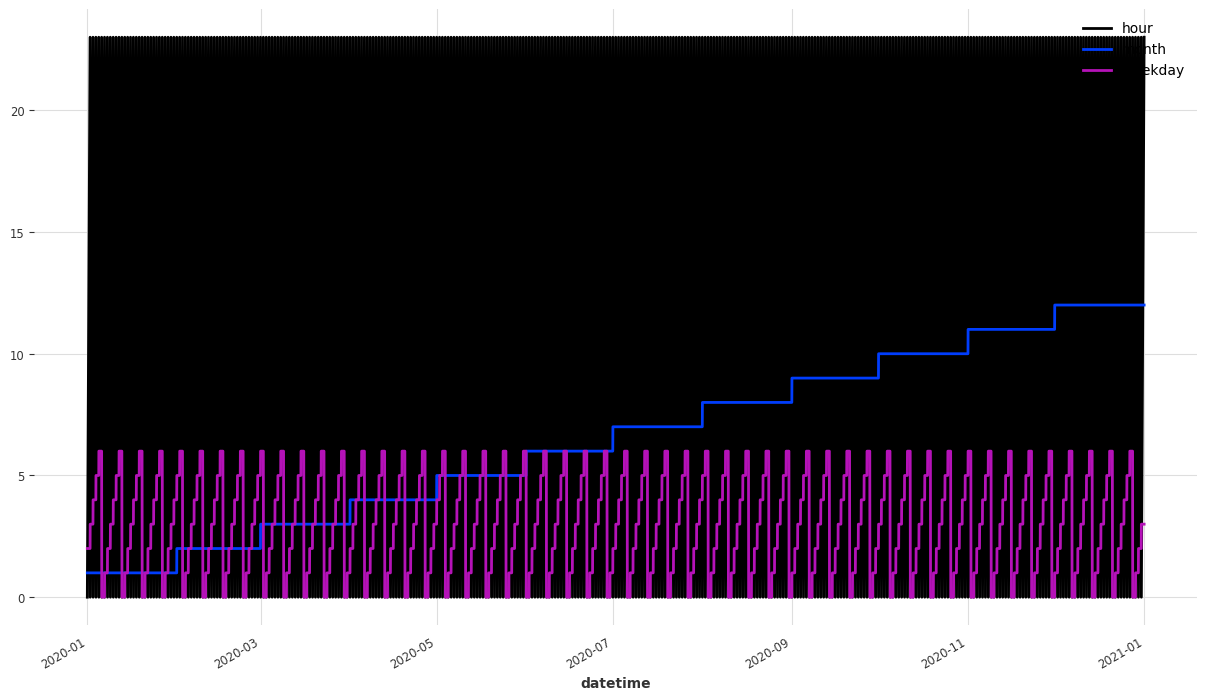

In [178]:
time_covariates = concatenate(
    [
        dt_attr(series.time_index, 'hour', dtype=np.float32),
        dt_attr(series.time_index, 'month', dtype=np.float32),
        dt_attr(series.time_index, 'weekday', dtype=np.float32)
    ],
    axis='component'
)
plt.figure(figsize=(15, 8))
time_covariates.plot()

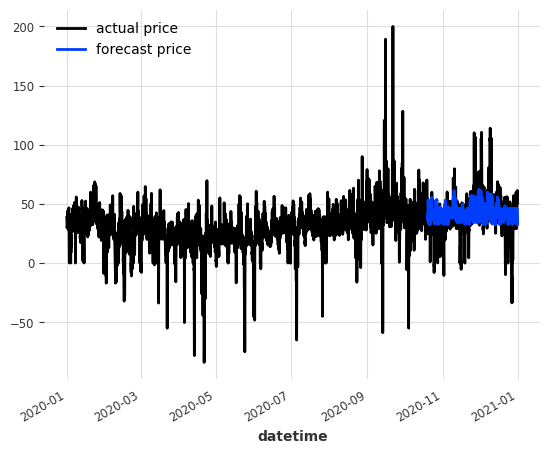

In [179]:
model_covariants = models.XGBModel(
    lags=[-7000,-168],
    lags_future_covariates=[-168, 0],
)
model_covariants.fit(
    train_price_scaled,
    future_covariates=[not_renewable_scaled, wind_scaled, time_covariates]
)

pred_price = model_covariants.predict(
    series=train_price_scaled,
    future_covariates=[not_renewable_scaled, wind_scaled, time_covariates],
    n=len(test_data)
)

pred_price = scaler.inverse_transform(pred_price)
series.plot(label='actual price')
pred_price.plot(label='forecast price')

In [180]:
mape(series, pred_price, inter_reduction=np.mean)

1618.9818107401024

In [182]:
backtest_covariants = model_covariants.backtest(
    series,
    start=0.98,
    future_covariates=time_covariates,
    forecast_horizon=168,
    reduction=np.mean,
    verbose=True
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 1989.65


### no wind_speed

In [141]:
# Extract solar_radiation and wind_speed as covariates
past_covariates = df[['solar_radiation', 'temperature']]

# Remove solar_radiation and wind_speed from the main dataframe
#df.drop(columns=['solar_radiation', 'wind_speed', 'temperature'], inplace=True)

# Define a boolean variable to use in the backtest function
past_covariates_bool = past_covariates[:-24*7].empty

average_error = model.backtest(
    series,
    past_covariates=past_covariates_bool,
    start=0.98,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 1989.65


### covariates - type of energy

In [142]:
# Extract solar_radiation and wind_speed as covariates
past_covariates = df[['nuclear_power', 'not_renewable', 'renewable']]


# Define a boolean variable to use in the backtest function, 
past_covariates_bool = past_covariates[:-24*7].empty

average_error = model.backtest(
    series,
    past_covariates=past_covariates_bool,
    start=0.98,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

  0%|          | 0/10 [00:00<?, ?it/s]

Average error (MAPE) over all historical forecasts: 1989.65


### covariates - weather + type energy

In [153]:
# Extract solar_radiation and wind_speed as covariates
past_covariates = df[['solar_radiation', 'wind_speed', 'temperature', 'nuclear_power', 'not_renewable', 'renewable']]

# Remove solar_radiation and wind_speed from the main dataframe
#df.drop(columns=['solar_radiation', 'wind_speed', 'temperature'], inplace=True)

# Define a boolean variable to use in the backtest function
past_covariates_bool = past_covariates[:-24*7].any

print(past_covariates_bool)



<bound method NDFrame._add_numeric_operations.<locals>.any of       solar_radiation  wind_speed  temperature  nuclear_power  not_renewable  \
0                   0         2.4         -0.1     8088.21750    29512.74850   
1                   0         2.4         -0.5     8081.15875    29178.66275   
2                   0         2.5         -0.7     8071.44750    29414.36225   
3                   0         2.4         -1.0     8072.27750    29365.12575   
4                   0         2.4         -1.2     8068.91550    29436.37500   
...               ...         ...          ...            ...            ...   
8611                0         3.9          3.5     7789.26025    25169.33400   
8612                0         3.8          3.3     7806.75975    24964.92725   
8613                0         3.9          3.1     7803.59075    24660.13850   
8614                0         3.9          2.9     7820.96000    23565.62375   
8615                0         3.9          2.7     7902.93

In [154]:
average_error = model.backtest(
    series,
    past_covariates=past_covariates_bool,
    start=0.98,
    forecast_horizon=168,
    metric=mape,
    reduction=np.mean,  # this is actually the default
    verbose=True,
)

print("Average error (MAPE) over all historical forecasts: %.2f" % average_error)

TypeError: 'method' object is not subscriptable

In [143]:
print(past_covariates_bool)

False
